<a href="https://colab.research.google.com/github/AASIFMALIK5101/Hotel-booking-capstone/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive 

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
hotel_data=pd.read_csv("/content/drive/MyDrive/capstone project 1/Copy of Hotel Bookings.csv")

# **INSPECTING THE DATASET**

In [5]:
#checking some rows 
hotel_data.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
# making a copy of the data
c_hotel_data=hotel_data.copy()

In [7]:
#checking the number of indicies 
hotel_data.index

RangeIndex(start=0, stop=119390, step=1)

In [8]:
# checking the columns
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
# checking columns informa
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# checking some important values from the columns
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
# checking column by column data
hotel_data["hotel"]

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

In [12]:
#checking unique hotels
hotel_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [13]:
# here we have only Distinct types of hotels
# 1."RESORT HOTEL"
# 2."CITY HOTEL"
        # NOW CHECKING NUMBER 
hotel_data["hotel"].value_counts()      


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

CITY HOTEL OCCURS 79330 TIMES 
RESORT HOTEL OCCURS 40060 TIMES

In [14]:
hotel_data["arrival_date_year"].unique()

array([2015, 2016, 2017])

**HERE WE HAVE THE DATA OF THREE YEARS 2015 2016 2017 ***

In [15]:
# Counting number of visits per year
hotel_data["arrival_date_year"].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

*  **2016 ------56707**
*  **2017------40687**
*  **2015------21996**




## **fIRST OF ALL WE HAVE TO CLEAN THE GIVEN DATASET**

In [16]:
no_of_missing_value=hotel_data.isnull().sum()
no_of_missing_value

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **here we have null values in our data we have null values in the columns**
 * **1.children**
 * **2.country**
 * **3.agent**
 * **4.company**

In [17]:
percent_of_null=(no_of_missing_value/len(hotel_data))*100
percent_of_null

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

**HERE WE HAVE THE PERCENTAGE OF NULL VALUES**

In [18]:
total=pd.concat([no_of_missing_value,percent_of_null],axis=1)

In [19]:
total.columns=["number of null values","null value %age"]

In [20]:
total

,number of null values,null value %age
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


# **HANDLING OR FILLING THE MISSING DATA**

**from the above table we observe that in the column company max values are null (94%) so we ca drop that column**

In [21]:
hotel_data.drop("company",axis=1,inplace=True) #dropping company column

In [22]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## **1->here in country column we have 488 missing values we have to fill that places**

In [23]:
hotel_data["country"]=hotel_data["country"].fillna("others") #filling missing data in the country column by the others

In [24]:
hotel_data["country"].head(45)

0        PRT
1        PRT
2        GBR
3        GBR
4        GBR
5        GBR
6        PRT
7        PRT
8        PRT
9        PRT
10       PRT
11       PRT
12       USA
13       ESP
14       PRT
15       IRL
16       PRT
17       IRL
18       FRA
19       GBR
20       GBR
21       PRT
22       PRT
23       PRT
24       GBR
25       PRT
26       IRL
27       PRT
28       PRT
29       PRT
30    others
31       GBR
32       PRT
33       IRL
34       PRT
35       PRT
36       ESP
37       PRT
38       PRT
39       ROU
40       PRT
41       IRL
42       ESP
43       ROU
44       PRT
Name: country, dtype: object

## **2--->filling missing data in the children column here we only four missing values**

In [25]:
hotel_data["children"].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [26]:
hotel_data["children"]=hotel_data["children"].fillna(hotel_data["children"].mean())# filling missing by the mean of available data

In [27]:
hotel_data["children"]=hotel_data["children"].astype(int)

In [28]:
hotel_data["children"].unique()

array([ 0,  1,  2, 10,  3])

In [29]:
hotel_data["agent"]

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

# **3.filling missing data in the agent column**

In [30]:
hotel_data["agent"]=hotel_data["agent"].fillna(0)
hotel_data["agent"]=hotel_data["agent"].astype(int)
hotel_data["agent"]

0           0
1           0
2           0
3         304
4         240
         ... 
119385    394
119386      9
119387      9
119388     89
119389      9
Name: agent, Length: 119390, dtype: int64

## **ANALYSING THE DATASET AFTER CLEANING THAT IS FINDING THE INSIGHTS FROM THE DATASET**
# 1.HOTEL WISE PREFRENCE

In [31]:
hotel_wise=hotel_data["hotel"].value_counts()

In [32]:
city_hotel=hotel_wise["City Hotel"]
resort_hotel=hotel_wise["Resort Hotel"]

In [33]:
city_hotel


79330

In [34]:
resort_hotel

40060

In [35]:
values=[city_hotel,resort_hotel]
names=["City HOTEL","RESORT HOTEL"]

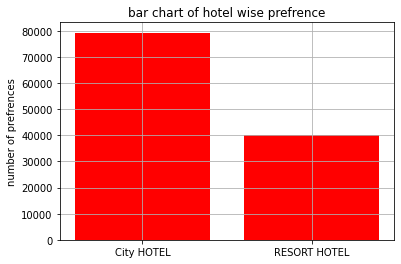

In [36]:
plt.bar(names,values,color="r")
plt.title("bar chart of hotel wise prefrence")
plt.ylabel("number of prefrences")
plt.grid(True)
plt.show()

In [37]:
import seaborn  as sns

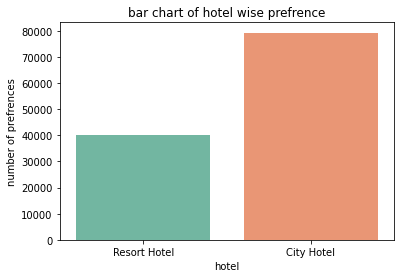

In [38]:
sns.countplot(x=hotel_data["hotel"],palette="Set2")
plt.title("bar chart of hotel wise prefrence")
plt.ylabel("number of prefrences")
plt.show()

**more people are choosing city hotel as compeared to resort hotel**

## **2.Hotel wise longer waiting time**
**here we will analyse in which type of hotel there is more waiting time** 

In [39]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [40]:
max_waiting_time=hotel_data.groupby("hotel").max()["days_in_waiting_list"].reset_index()
max_waiting_time

,hotel,days_in_waiting_list
0,City Hotel,391
1,Resort Hotel,185


In [41]:
max_waiting_time.columns=["Hotel","Max_Waiting_Time"]

In [42]:
max_waiting_time

,Hotel,Max_Waiting_Time
0,City Hotel,391
1,Resort Hotel,185


In [43]:
avg_waiting_time=hotel_data.groupby("hotel").mean()["days_in_waiting_list"].reset_index()

In [44]:
avg_waiting_time.columns=["Hotel","Avg_Waiting_Time"]

In [45]:
avg_waiting_time

,Hotel,Avg_Waiting_Time
0,City Hotel,3.226774
1,Resort Hotel,0.527758


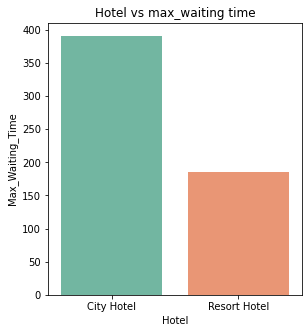

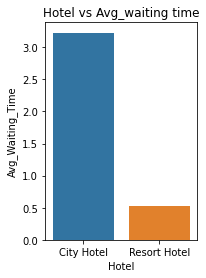

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.barplot(x=max_waiting_time["Hotel"],y=max_waiting_time["Max_Waiting_Time"],palette="Set2")
plt.title("Hotel vs max_waiting time")
plt.show()
plt.subplot(1,2,1)
sns.barplot(x=avg_waiting_time["Hotel"],y=avg_waiting_time["Avg_Waiting_Time"],palette="tab10")
plt.title("Hotel vs Avg_waiting time")
plt.show()



In [47]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


# **3.Customer wise analysis**
**in this step we analyse the customers that is we check the customers belong to which category**

In [48]:
hotel_data["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [49]:
hotel_data.groupby("customer_type").sum()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
customer_type,,,,,,,,,,,,,,,,,,,
Contract,1262,582745,8215220,137370,62103,5990,15697,7824,267,32,33,919,17,488,233742,161,356852.32,135,2971
Group,59,31768,1163258,16983,9003,476,1187,1354,38,5,161,21,343,170,52130,213,48172.91,51,372
Transient,36514,8360491,180682168,2378450,1415452,84130,224779,169081,11289,821,3073,6650,14648,16835,6761737,118009,9589811.59,6440,56598
Transient-Party,6389,3442919,50648285,710447,399594,20150,56848,43377,809,91,543,2811,1360,8907,1886144,158739,2162780.78,838,8274


In [50]:
customer=hotel_data["customer_type"].value_counts().reset_index()

In [51]:
customer.columns=["Customer_type","number_of_customers"]

In [52]:
customer

,Customer_type,number_of_customers
0,Transient,89613
1,Transient-Party,25124
2,Contract,4076
3,Group,577


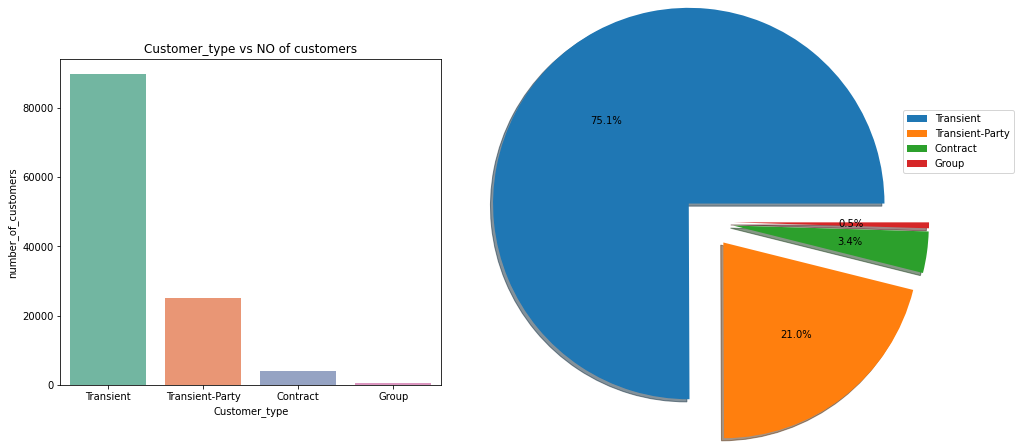

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=customer["Customer_type"],y=customer["number_of_customers"],palette="Set2")
plt.title("Customer_type vs NO of customers")
plt.subplot(1,2,2)
plt.pie(hotel_data["customer_type"].value_counts(),autopct="%1.1f%%",shadow=True,radius=1.5,explode=[.2]*4)
plt.legend(labels=hotel_data["customer_type"].value_counts().index.tolist(),loc=(1.1,.65))
plt.show()

**here we can see the max number of customers are from transient category  that is about  75.1% customer are in Transient category**

# **4.counrty origin customer analysis**
**in this step we analyse the flow of guests that is the flow of guests from different countries** 

In [54]:
country=hotel_data["country"].value_counts().reset_index()[:10]

In [55]:
country.columns=["country_name","number_of_guests"]

In [56]:
country

,country_name,number_of_guests
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


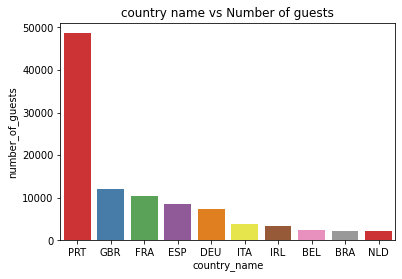

In [57]:
sns.barplot(x=country["country_name"],y=country["number_of_guests"],palette='Set1')
plt.title("country name vs Number of guests")
plt.show()

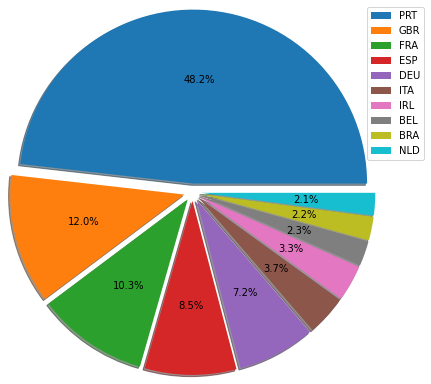

In [58]:
plt.pie(country["number_of_guests"],autopct="%1.1f%%",shadow=True,radius=2,explode=[.1]*10)
plt.legend(labels=country["country_name"].value_counts().index.tolist(),loc=(1.3,.65))
plt.show()

**top 5 countries from which most guests are visiting**
* **1.PROTUGUAL-->55.9%**
* **2.GREAT BRITAIN-->13.9%**
* **3.FRANCE---->12%**
* **ESP--->9.8%**
* **DEU---->8.4%**

# **5.DISTRIBUTOR CHANNEL ANALYSIS**
**here we analyze the guests are comming from which distribution channel**

In [59]:
distribution_channel=hotel_data["distribution_channel"].value_counts().reset_index()

In [60]:
distribution_channel.columns=["distribution_type","number_of_guests"]

In [61]:
distribution_channel

,distribution_type,number_of_guests
0,TA/TO,97870
1,Direct,14645
2,Corporate,6677
3,GDS,193
4,Undefined,5


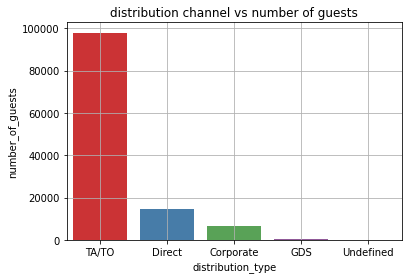

In [62]:
sns.barplot(x=distribution_channel["distribution_type"],y=distribution_channel["number_of_guests"],palette='Set1')
plt.title("distribution channel vs number of guests")
plt.grid(True)
plt.show()

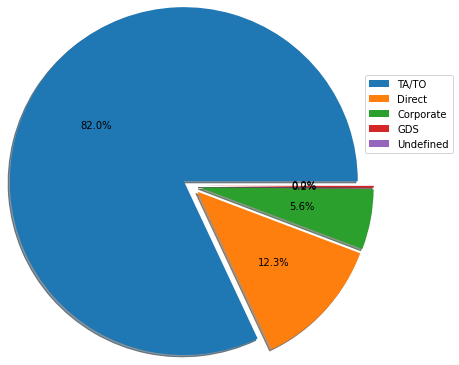

In [63]:
plt.pie(distribution_channel["number_of_guests"],autopct="%1.1f%%",shadow=True,radius=2,explode=[.1]*5)
plt.legend(labels=distribution_channel["distribution_type"].value_counts().index.tolist(),loc=(1.3,.65))
plt.show()

# **As a result we found that number of guests are comming from**
* **1.TA/TO-->97870 that is 82%**
* **2.Direct-->14645 that is 12.3%**
* **3.corporate-->677 that is 5.6%**
* **4.GDS--->193 that is 0.2%**
* **5.undefined-->5 that is close to 0.001%**